In [5]:
import tensorflow as tf  
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np

In [3]:
import torch

torch.cuda.is_available()

True

In [4]:
embedding = SentenceTransformer(r"C:\Users\mmumt\Downloads\b7bot\multilingual-e5-large").to('cuda')

In [7]:
df = pd.read_csv('covid-19_vaccine_tweets_with_sentiment.csv',encoding='ISO-8859-1')
df.head()

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [8]:
df.shape

(6000, 3)

In [20]:
labels = [i-1 for i in df['label'].tolist()]

In [10]:
encoded_texts = embedding.encode(df['tweet_text'].tolist())

In [22]:
encoded_texts[0].shape

(1024,)

In [23]:
y_one_hot = tf.keras.utils.to_categorical(labels, 3)

In [28]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(1024,)),              
    layers.Dense(512, activation='relu'),               
    layers.Dropout(0.5),                                
    layers.Dense(256, activation='relu'),               
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')     
])

In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    encoded_texts, y_one_hot,
    epochs=20,                # Jumlah epoch
    batch_size=32,            # Ukuran batch
    validation_split=0.2      # 20% data untuk validasi
)

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6089 - loss: 0.8578 - val_accuracy: 0.6758 - val_loss: 0.7509
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7274 - loss: 0.6679 - val_accuracy: 0.7108 - val_loss: 0.6600
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7339 - loss: 0.6017 - val_accuracy: 0.7067 - val_loss: 0.6778
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7578 - loss: 0.5513 - val_accuracy: 0.7158 - val_loss: 0.6301
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7759 - loss: 0.5397 - val_accuracy: 0.7175 - val_loss: 0.6280
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7799 - loss: 0.5281 - val_accuracy: 0.7183 - val_loss: 0.6120
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7670 - loss: 0.5213 - val_accuracy: 0.7200 - val_loss: 0.6244
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7901 - loss: 0.4940 - val_accuracy: 0.

In [46]:
pred = model.predict(encoded_texts[1].reshape(1,1024))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[3.0344058e-04, 9.7320098e-01, 2.6495598e-02]], dtype=float32)

In [47]:
import numpy as np

np.argmax(pred)

1

In [40]:
encoded_texts[0].shape

(1024,)

In [31]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

%matplotlib inline
import matplotlib.pyplot as plt

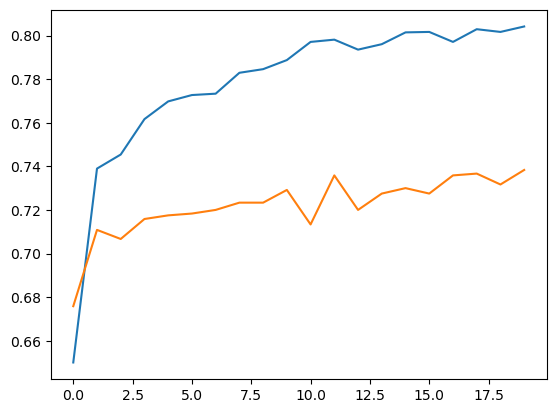

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

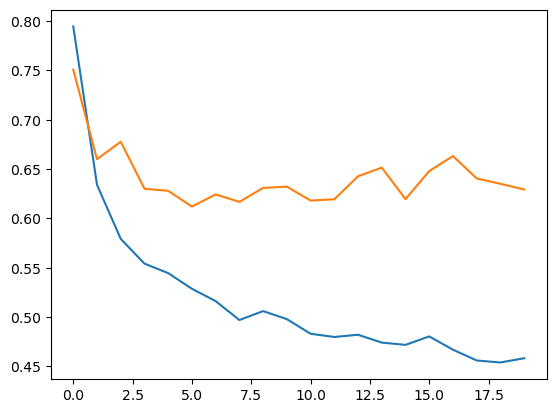

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [36]:
model.save('nn_sentiment.h5')